INTRODUCTION:
This project aims to analyze coffee sales data using python to discover usefule business insights. Coffee is one of the most consumed beverage worldwide, and understanding customer behaviour can help optimize product offerings and increased profits.

The main goal of this project is:
To identifying which coffee sells the most.
To identifying how much profit each coffee brings in.
To analyze monthly trends in coffee sales.
To determining how many people don't use card for payment.
To identifying the average sales for each month.
To identifying the peak hour of the day when the coffee is most sold.
This analysis is useful for cafe owners, managers, or marketers who want to make data-driven decisions for improving coffee shop operations.

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("index.csv")           # Loading my CSV file

# Preview first 5 rows
df.head()

,date,time,month,cash_type,card,money,coffee_name,monthly_sales
0,01-03-2024,10:15:51 AM,March,card,ANON-0000-0000-0001,38.7,Latte,7050.2
1,01-03-2024,12:19:23 PM,March,card,ANON-0000-0000-0002,38.7,Hot Chocolate,7050.2
2,01-03-2024,12:20:18 PM,March,card,ANON-0000-0000-0002,38.7,Hot Chocolate,7050.2
3,01-03-2024,1:46:33 PM,March,card,ANON-0000-0000-0003,28.9,Americano,7050.2
4,01-03-2024,1:48:15 PM,March,card,ANON-0000-0000-0004,38.7,Latte,7050.2


DATA CLEANING:
The data was mostlyclean but a few minor adjustments were made:
Combined date and time column was skipped due to parsing issues, so insted the "hour" was extracted directly from the "time" column.
The "monthly_sales" column was ignored since it repeated the same value.
The "month" and "hour" values were extracted to help with time-based analysis.
Card IDs were anonymized, so they were also excluded from the analysis.

In [156]:
# Extracting hour from time
df['hour'] = pd.to_datetime(df['time'], format='%I:%M:%S %p').dt.hour

# Standardizing month formatting
df['month'] = df['month'].str.capitalize()

month_order = ['January', 'February', 'March','April', 'May', 'june', 'july']       # Correct month order
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)
df = df[df['month'].notna()]

columns_to_drop = ['monthly_sales', 'card']                                     # Droping unused columns
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

| coffee_name         |   Total sales |
|:--------------------|--------------:|
| Latte               |           137 |
| Americano with Milk |           134 |
| Americano           |           119 |
| Cappuccino          |           118 |
| Cortado             |            66 |
| Hot Chocolate       |            49 |
| Espresso            |            25 |
| Cocoa               |            21 |


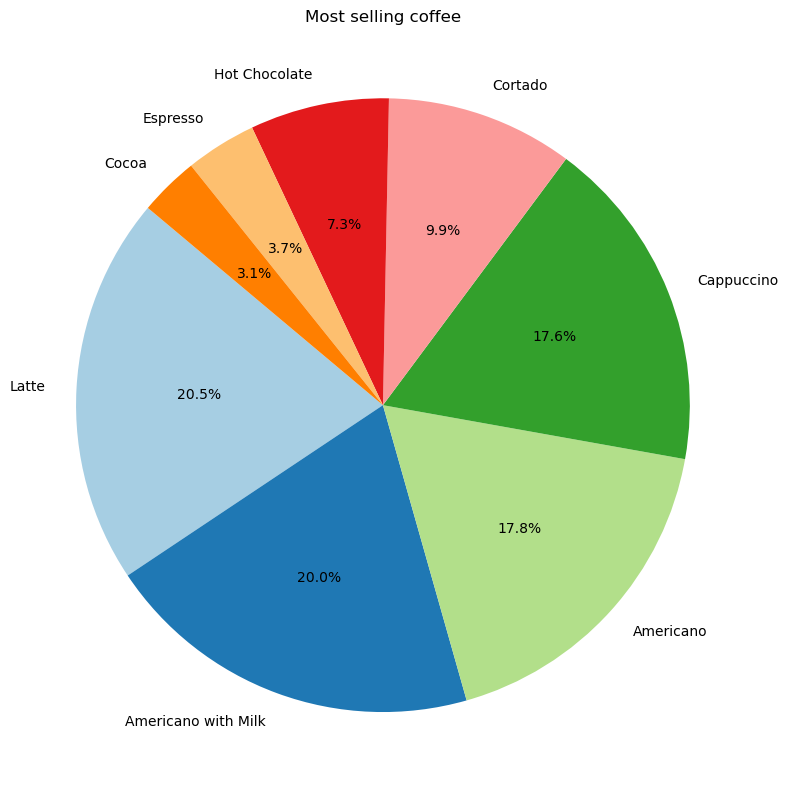

In [157]:
# 1. Identifying which coffee sells the most 

coffee_sales = df['coffee_name'].value_counts()

print(coffee_sales.to_frame(name='Total sales').to_markdown())     # Display as table

plt.figure(figsize=(8, 8))
plt.pie(coffee_sales, labels=coffee_sales.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Most selling coffee')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [158]:
# 2. Identifying how much profit each coffee brings in

coffee_profit = df.groupby('coffee_name')['money'].sum().sort_values(ascending=False)

print(coffee_profit.to_frame(name='Total profit').to_markdown())        # Display as table

| coffee_name         |   Total profit |
|:--------------------|---------------:|
| Latte               |        5265.62 |
| Cappuccino          |        4518.38 |
| Americano with Milk |        4470.02 |
| Americano           |        3395.54 |
| Cortado             |        1892.32 |
| Hot Chocolate       |        1889.38 |
| Cocoa               |         805.78 |
| Espresso            |         597.14 |


| month    |   Americano |   Americano with Milk |   Cappuccino |   Cocoa |   Cortado |   Espresso |   Hot Chocolate |   Latte |
|:---------|------------:|----------------------:|-------------:|--------:|----------:|-----------:|----------------:|--------:|
| January  |           0 |                     0 |            0 |       0 |         0 |          0 |               0 |       0 |
| February |           0 |                     0 |            0 |       0 |         0 |          0 |               0 |       0 |
| March    |          36 |                    34 |           20 |       6 |        30 |         10 |              22 |      48 |
| April    |          35 |                    42 |           43 |       6 |        19 |          7 |              13 |      31 |
| May      |          48 |                    58 |           55 |       9 |        17 |          8 |              14 |      58 |


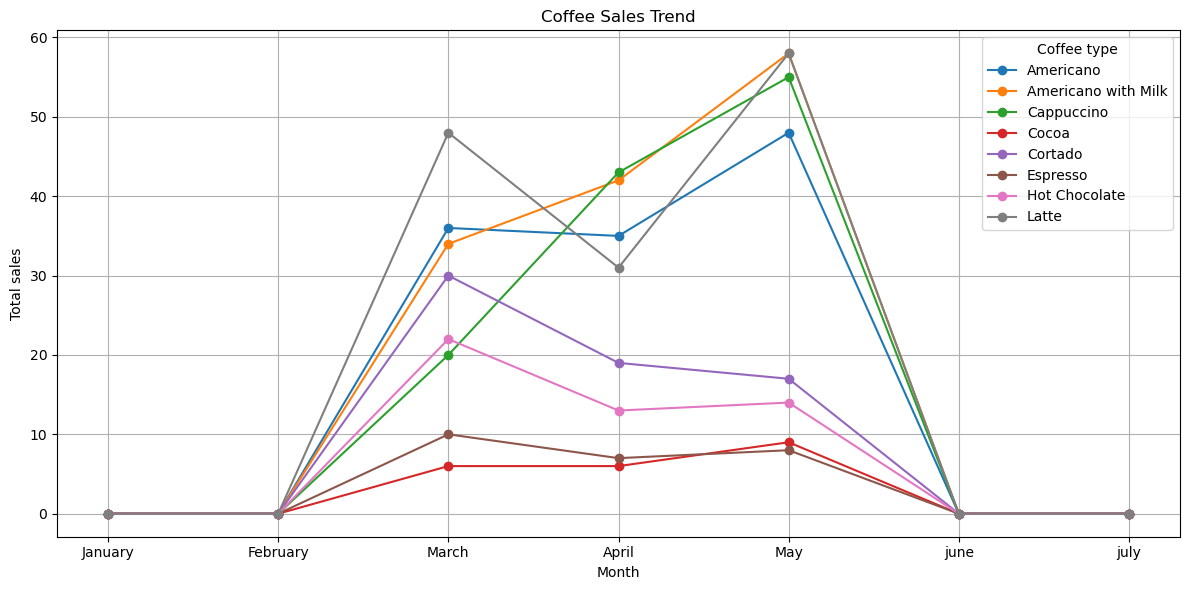

In [159]:
# 3. Analyze monthly trends in coffee sales

monthly_trends = df.groupby(['month', 'coffee_name'], observed=False).size().unstack().fillna(0)

print(monthly_trends.head().to_markdown())              # Display as table

# Visualization
monthly_trends.plot(kind='line', figsize=(12, 6), marker= 'o')
plt.title("Coffee Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total sales")
plt.legend(title='Coffee type')
plt.grid(True)
plt.tight_layout()
plt.show()

In [160]:
# 4. Determining how many people don't use card for payment

non_card_count = df[df['cash_type'].str.lower() !='card'].shape[0]
print(f"Total transactions without card: **{non_card_count}**")

Total transactions without card: **85**


In [161]:
# 5. Identifying the average sales for each month

monthly_avg_sales = df.groupby('month', observed=True).size().mean()
print(f"Averge sales per month: **{monthly_avg_sales:.2f}** transactions")

Averge sales per month: **223.00** transactions


|   hour |   Transactions |
|-------:|---------------:|
|     10 |             87 |
|     13 |             62 |
|     19 |             62 |
|     11 |             61 |
|     14 |             56 |
|     18 |             56 |
|     12 |             55 |
|     17 |             55 |
|     15 |             50 |
|     16 |             49 |
|     20 |             22 |
|     21 |             13 |
|      8 |             12 |
|      9 |             12 |
|     22 |             11 |
|      7 |              6 |


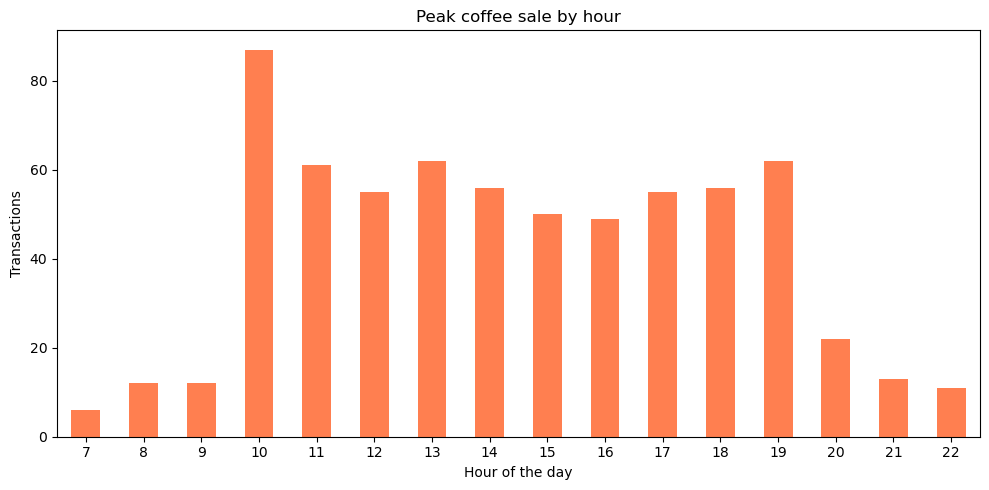

In [162]:
# 6. Identifying the peak hour of the day when the coffee is most sold

hourly_sales = df.groupby('hour').size().sort_values(ascending=False)

print(hourly_sales.to_frame(name='Transactions').to_markdown())        # Display as table

hourly_sales.sort_index().plot(kind='bar', figsize=(10, 5), color='coral')        # Visualization bar chart
plt.title("Peak coffee sale by hour")
plt.xlabel("Hour of the day")
plt.ylabel("Transactions")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

EXPLORATORY DATA ANALYSIS (EDA):
Key questions explored:

a. Which coffee sells the most ?
  "Latte" is the coffee that sells the most though "Amaricano with Milk" is in competition.

b. How much profit each coffee brings in ?
| coffee_name         |   Total profit |
|:--------------------|---------------:|
| Latte               |        5265.62 |
| Cappuccino          |        4518.38 |
| Americano with Milk |        4470.02 |
| Americano           |        3395.54 |
| Cortado             |        1892.32 |
| Hot Chocolate       |        1889.38 |
| Cocoa               |         805.78 |
| Espresso            |         597.14 |

c. Monthly trends in coffee sales ?
   The coffee sales trends in the months from February to June, probably because it's the time of ending and starting of the financial year.

d. How many people don't use card for payment ?
   Only "85" people did not use card for payment out of "1134" people transactions.

e. Average sales for each month ?
   The average sales for each month is "223.00".
   
f. The peak hour of the day when the coffee is most sold ?
   The peak hour of the day is 10 AM probably because most people start their work from 10:30 AM.


INSIGHTS AND CONCLUSION:
Best seller: Latte, Cappuccino, Amricano with Milk, and Amaricano.
Most profitable: Latte
Peak hour: Most transactions occur around 10 AM to 7 PM, likely due to office work hours.
Customer behaviour: Most customers prefer card payment, only 13% used cash.

